<a href="https://colab.research.google.com/github/kavya-kango/linear_regression_model/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#loading dataset

In [ ]:
from sklearn.datasets import fetch_california_housing

In [ ]:
df=fetch_california_housing()

In [ ]:
dataset=pd.DataFrame(df.data)

In [ ]:
dataset.columns=df.feature_names

In [ ]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
X= dataset
Y=df.target


#splitting data for training and testing


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train ,X_test,Y_train , Y_test= train_test_split(X,Y,test_size=0.30,random_state=42)

#Standarizing the data for training

In [ ]:
from sklearn.preprocessing import StandardScaler
Scalar= StandardScaler()
X_train = Scalar.fit_transform(X_train)
X_test= Scalar.transform(X_test)

#Training data using linear regression


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


In [ ]:
regression = LinearRegression()
regression.fit(X_train,Y_train)

LinearRegression()

In [ ]:
mse=cross_val_score(regression,X_train, Y_train,scoring='neg_mean_squared_error',cv=5)

In [ ]:
np.mean(mse)

np.float64(-0.5268253746355748)

In [ ]:
predict =regression.predict(X_test)

In [ ]:
predict


array([0.72604907, 1.76743383, 2.71092161, ..., 2.07465531, 1.57371395,
       1.82744133])

#checking the difference between predicted and actual results using dist

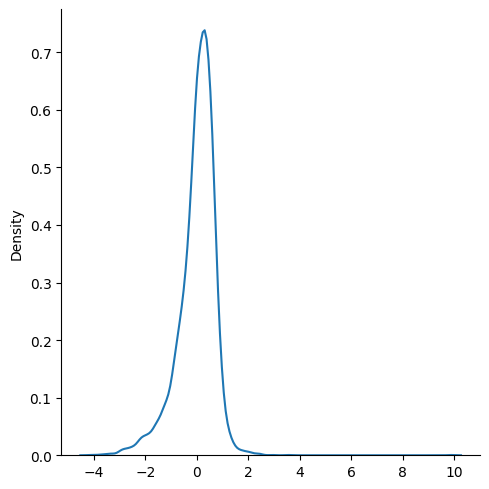

In [ ]:
import seaborn as sns
sns.displot(predict-Y_test,kind='kde')

In [ ]:
from sklearn.metrics import r2_score
score=r2_score(predict,Y_test)
score

0.3451339380943961

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
ridge_regressor=Ridge()
ridge_regressor

Ridge()

In [ ]:
parameters={'alpha':[1,2,3,4,5,10,20,30,40,50,50]}
ridgecv= GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 50]},
             scoring='neg_mean_squared_error')

In [ ]:
print(ridgecv.best_params_)

{'alpha': 5}


In [ ]:
print(ridgecv.best_score_)

-0.5268179966861514


In [ ]:
ridgepredict=ridgecv.predict(X_test)

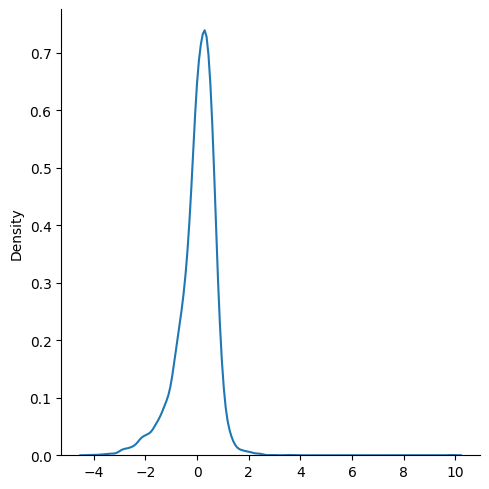

In [ ]:
sns.displot(ridgepredict-Y_test,kind='kde')

In [ ]:
score=r2_score(ridgepredict,Y_test)
score

0.34383945441404484

#Lasso regression

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
Lasso = Lasso()

In [ ]:
Parameters = {'alpha':[1,2,3,4,5,6,7,8,10,20,30,40,50,60]}
lassocv= GridSearchCV(Lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lassocv.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 50]},
             scoring='neg_mean_squared_error')

In [ ]:
print(lassocv.best_params_)
print(lassocv.best_score_)

{'alpha': 1}
-1.3400019579636542


In [ ]:
lassopredict=lassocv.predict(X_test)

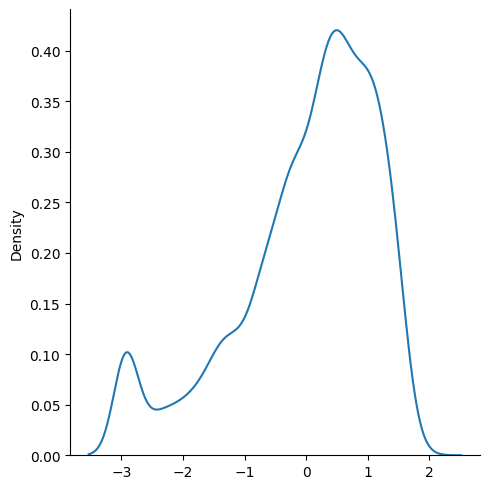

In [ ]:
sns.displot(lassopredict-Y_test,kind="kde")

In [ ]:
score=r2_score(lassopredict,Y_test)
score

0.0